In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [4]:
# Dataset from https://www.kaggle.com/datasets/ruchi798/analyzing-screen-time
data = pd.read_csv("data/Analyzing Screen Time/Screentime - Overall Usage.csv")
data

,Date,Total Usage,Notifications,Unlocks
0,08/26/2022,236,600,102
1,08/27/2022,194,411,96
2,08/28/2022,301,709,114
3,08/29/2022,190,542,119
4,08/30/2022,204,583,85
5,08/31/2022,229,578,101
6,09/01/2022,203,520,136
7,09/02/2022,200,548,112
8,09/03/2022,137,207,70
9,09/04/2022,187,267,89


Text(0.5, 0, 'Notifications')

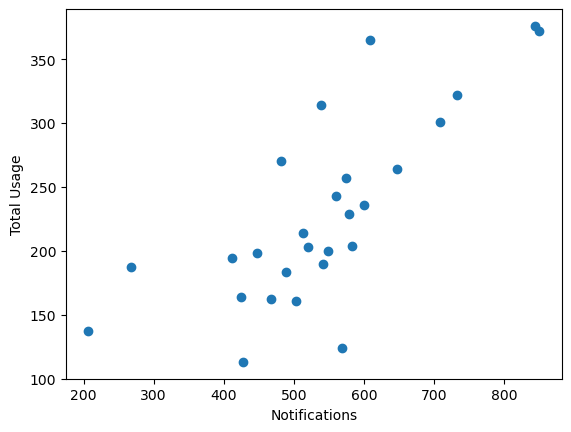

In [5]:
x = np.array(data['Notifications'])
y = np.array(data['Total Usage'])

plt.scatter(x,y)
plt.ylabel('Total Usage')
plt.xlabel('Notifications')

In [6]:
# Computing Cost

def computeCost(x,y,w,b):
    m = len(x)
    f_wb = w * x + b


    j_wb = (1 / (2 * m) * np.sum((f_wb - y)** 2))

    return j_wb,f_wb


j_wb, f_wb = computeCost(x,y,.33,40)



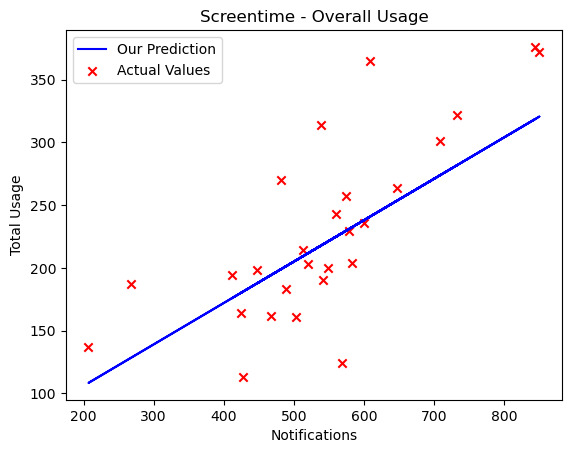

In [7]:


# Plot our model prediction
plt.plot(x, f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x,y, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Screentime - Overall Usage")
plt.ylabel('Total Usage')
plt.xlabel('Notifications')
plt.legend()
plt.show()

In [21]:
def compute_gradient(x,y,w,b):
  """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
  Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
  """
    
  dj_dw = 0
  dj_db = 0

  m = len(x)



  for i in range(m):
    f_wb = w * x[i] + b
    dj_dw_i = (f_wb - y[i]) * x[i]
    dj_db_i = f_wb - y[i]
    dj_dw += dj_dw_i
    dj_db += dj_db_i
    
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw,dj_db



In [22]:
compute_gradient(x,y,0,0)

(-131876.44444444444, -229.0)

In [23]:
def compute_gradientSimple(x,y,w,b):
  """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
  Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
  """
    
  dj_dw = 0
  dj_db = 0

  m = len(x)



  for i in range(m):
    f_wb = w * x[i] + b
    dj_dw_i = (f_wb - y[i]) * x[i]
    dj_db_i = f_wb - y[i]
    dj_dw += dj_dw_i
    dj_db += dj_db_i
    
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw,dj_db

